In [819]:
from src.sc import SubtractiveClustering
from src.fcm import FuzzyCMeans
import pandas
import numpy
import numpy.typing as npt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = [8, 5]

import warnings
warnings.filterwarnings('ignore')
# numpy.random.seed(0) # makes the random numbers predictable


In [820]:
import cpuinfo
my_cpuinfo = cpuinfo.get_cpu_info()
print(f"Full CPU Name: {my_cpuinfo['brand_raw']}")
print(f"CPU architecture: {my_cpuinfo['arch']}")
import psutil
print(f"Total RAM: {psutil.virtual_memory().total / 1024 / 1024 / 1024:.2f} GB")

Full CPU Name: Intel(R) Pentium(R) Gold G5400 CPU @ 3.70GHz
CPU architecture: X86_64
Total RAM: 15.87 GB


In [821]:
def plotting(data: npt.NDArray, centroids: npt.NDArray, title: str, plots: int, norma: bool, num_cntr: int) -> None:
    '''
     # Suplottings 
    # https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
    '''
    fig, ax = plt.subplots(plots)
    ax.set_title(title, fontsize=11)
    ax.scatter([i[0] for i in data], [i[1] for i in data], c = 'black',s = 10, alpha = 0.1, label = 'Spectrum data')
    ax.scatter([i[0] for i in centroids], [i[1] for i in centroids], marker='X', color = 'black', s = 50, label = 'Centroids clusters ($n={}$)'.format(num_cntr))
    ax.legend(fontsize=9)
    ax.set_xlabel('Channel', fontsize=9)
    ax.set_ylabel('Counts', fontsize=9)
    if norma:
        ax.text(0.18,0.65,'Cs-137', fontweight='bold', fontsize=9)
        ax.text(0.45,0.3,'K-40', fontweight='bold', fontsize=9)
        ax.text(0.8,0.08,'Th-228', fontweight='bold', fontsize=9)
    else:
        ax.text(180,170,'Cs-137', fontweight='bold', fontsize=9)
        ax.text(450,80,'K-40', fontweight='bold', fontsize=9)
        ax.text(810,8,'Th-228', fontweight='bold', fontsize=9)
    plt.show()
    

# Subtractive Clustering

In [822]:
data = pandas.read_csv('test/data.csv')
global r1
global r2
r1 = 12; r2 = r1 * 1.15
algorithm = 'SC'

In [823]:
# Case normalise imto unit hyperbox
norma_data = data.copy()
for i in range(0,data.shape[1]):
        norma_data.iloc[:, i] = (norma_data.iloc[:,i] - norma_data.min(axis = 0)[i])  / (norma_data.max(axis = 0)[i] - norma_data.min(axis = 0)[i])
norma_data = norma_data.to_numpy()
sc = SubtractiveClustering(r1,r2,verbose=False).fit(norma_data)
cntr = sc.centers

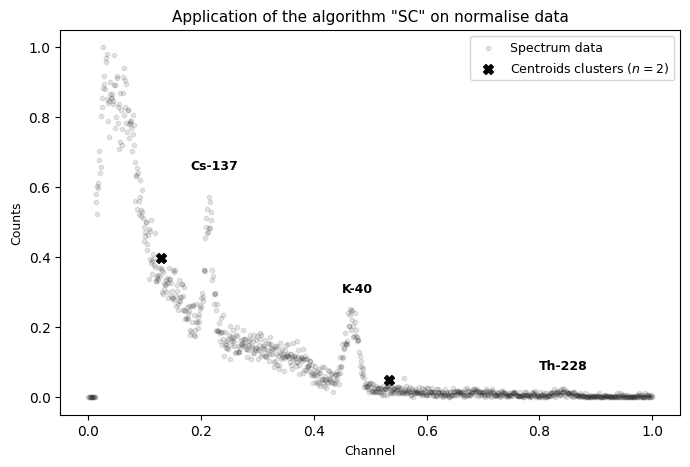

In [824]:
# Plotting
plotting(norma_data, cntr, title = 'Application of the algorithm "{}" on normalise data'.format(algorithm), plots = 1, norma = True, num_cntr = len(cntr))

In [825]:
# Case without normalization
sc = SubtractiveClustering(r1,r2).fit(data.to_numpy())
cntr = sc.centers

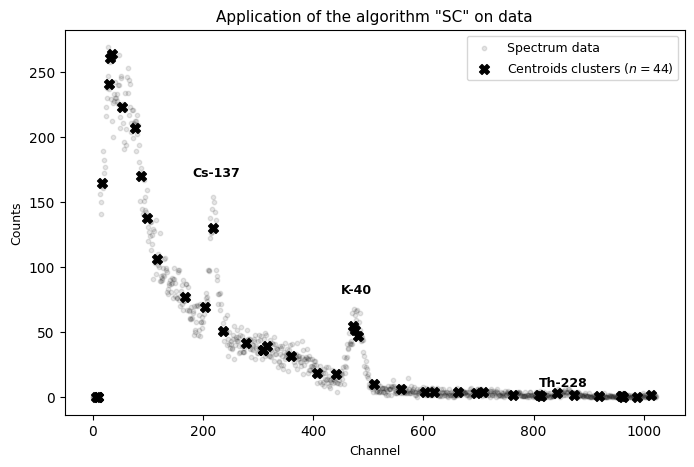

In [826]:
plotting(data.to_numpy(), cntr, title = 'Application of the algorithm "{}" on data'.format(algorithm), plots = 1, norma = False,  num_cntr = len(cntr))

# Fuzzy C-Means Clustering

In [827]:
algorithm = 'FCM'
model = FuzzyCMeans(3, verbose=False, tol_iter=100)
model.fit(data.to_numpy())
cntr = model.cluster_centers_

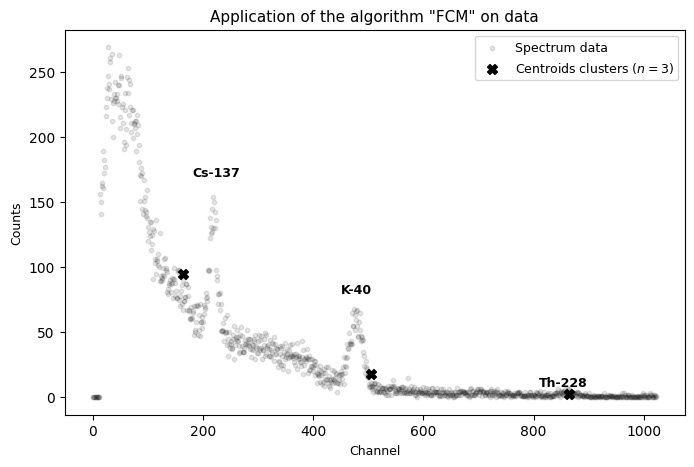

In [828]:
plotting(data.to_numpy(), cntr, title = 'Application of the algorithm "{}" on data'.format(algorithm), plots = 1, norma = False,  num_cntr = len(cntr))

In [829]:
model = FuzzyCMeans(3, verbose=False)
model.fit(norma_data)
cntr = model.cluster_centers_

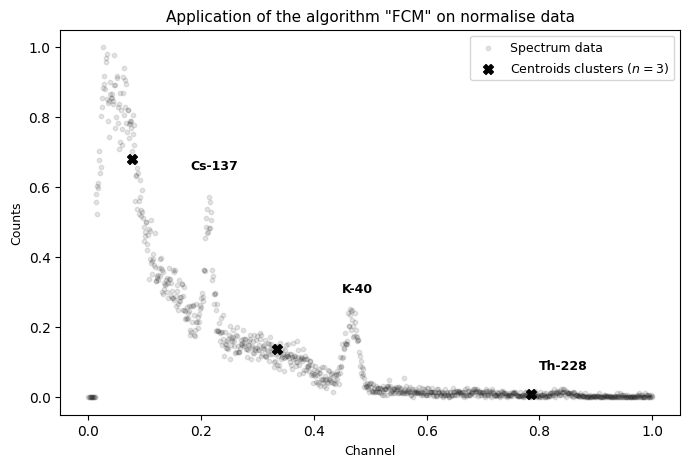

In [830]:
plotting(norma_data, cntr, title = 'Application of the algorithm "{}" on normalise data'.format(algorithm), plots = 1, norma = True,  num_cntr = len(cntr))

# SC+FCM (optimization)


In [831]:
# Normalization case
algorithm = 'SC + FCM'
sc = SubtractiveClustering(r1,r2).fit(norma_data)
cntr = sc.centers
l_cntr = len(cntr)
model = FuzzyCMeans(l_cntr, verbose=False)
model.fit(norma_data)
cntr = model.cluster_centers_

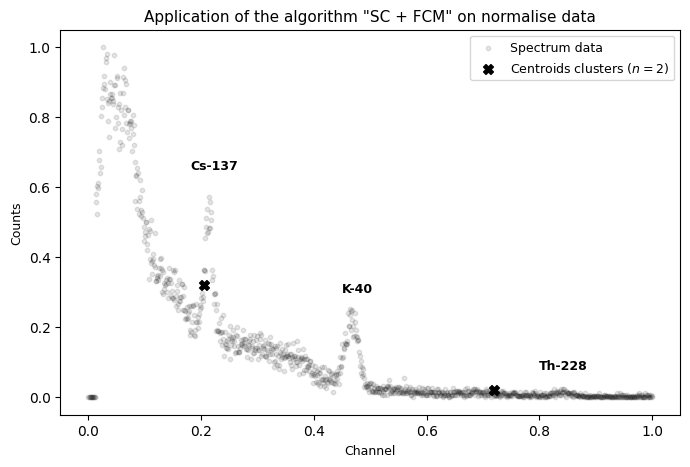

In [832]:
plotting(norma_data, cntr, title = 'Application of the algorithm "{}" on normalise data'.format(algorithm), plots = 1, norma = True,  num_cntr = len(cntr))

In [833]:
sc = SubtractiveClustering(r1,r2).fit(data.to_numpy())
cntr = sc.centers
l_cntr = len(cntr)
model = FuzzyCMeans(l_cntr, verbose=False)
model.fit(data.to_numpy())
cntr = model.cluster_centers_
print(r1)

12


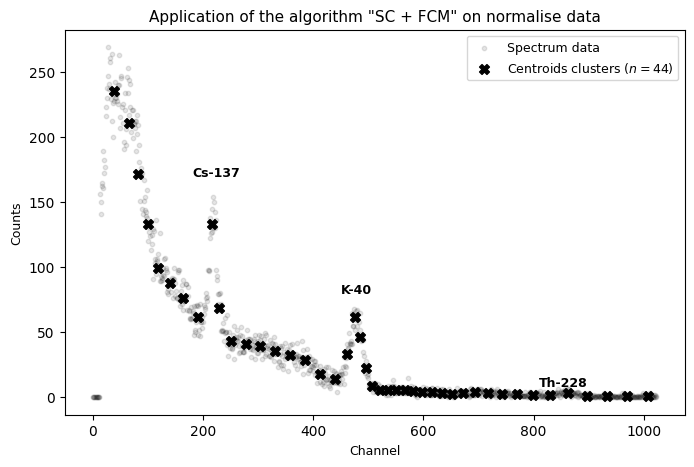

In [834]:
plotting(data.to_numpy(), cntr, title = 'Application of the algorithm "{}" on normalise data'.format(algorithm), plots = 1, norma = False,  num_cntr = len(cntr))